In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [6]:
df = pd.read_csv('../Data/yield_df.csv')
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


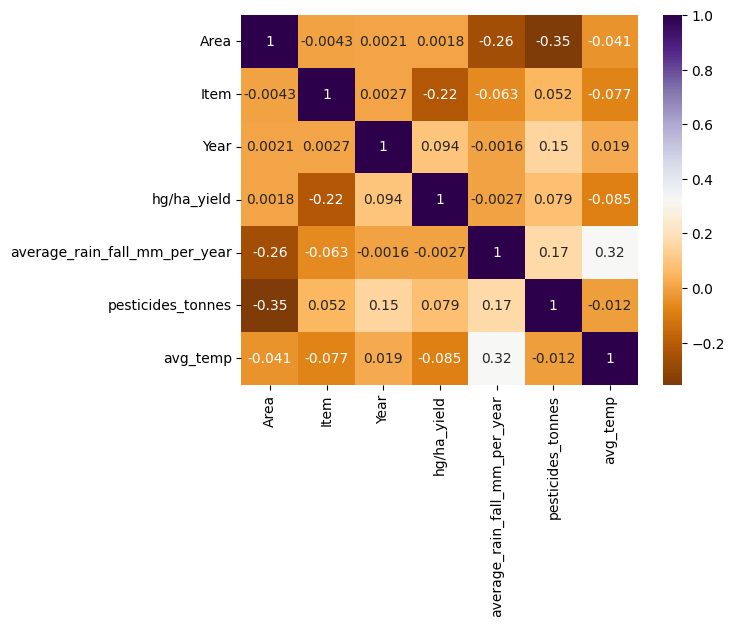

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)
country_counts = df["Area"].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df = df[~df["Area"].isin(countries_to_drop)].reset_index(drop=True)
datacorr = df.copy()
categorical_columns = datacorr.select_dtypes(include=["object"]).columns.tolist()

label_encoder = LabelEncoder()
for column in categorical_columns:
 datacorr[column] = label_encoder.fit_transform(datacorr[column])
sns.heatmap(datacorr.corr(), annot=True, cmap="PuOr")
plt.show()

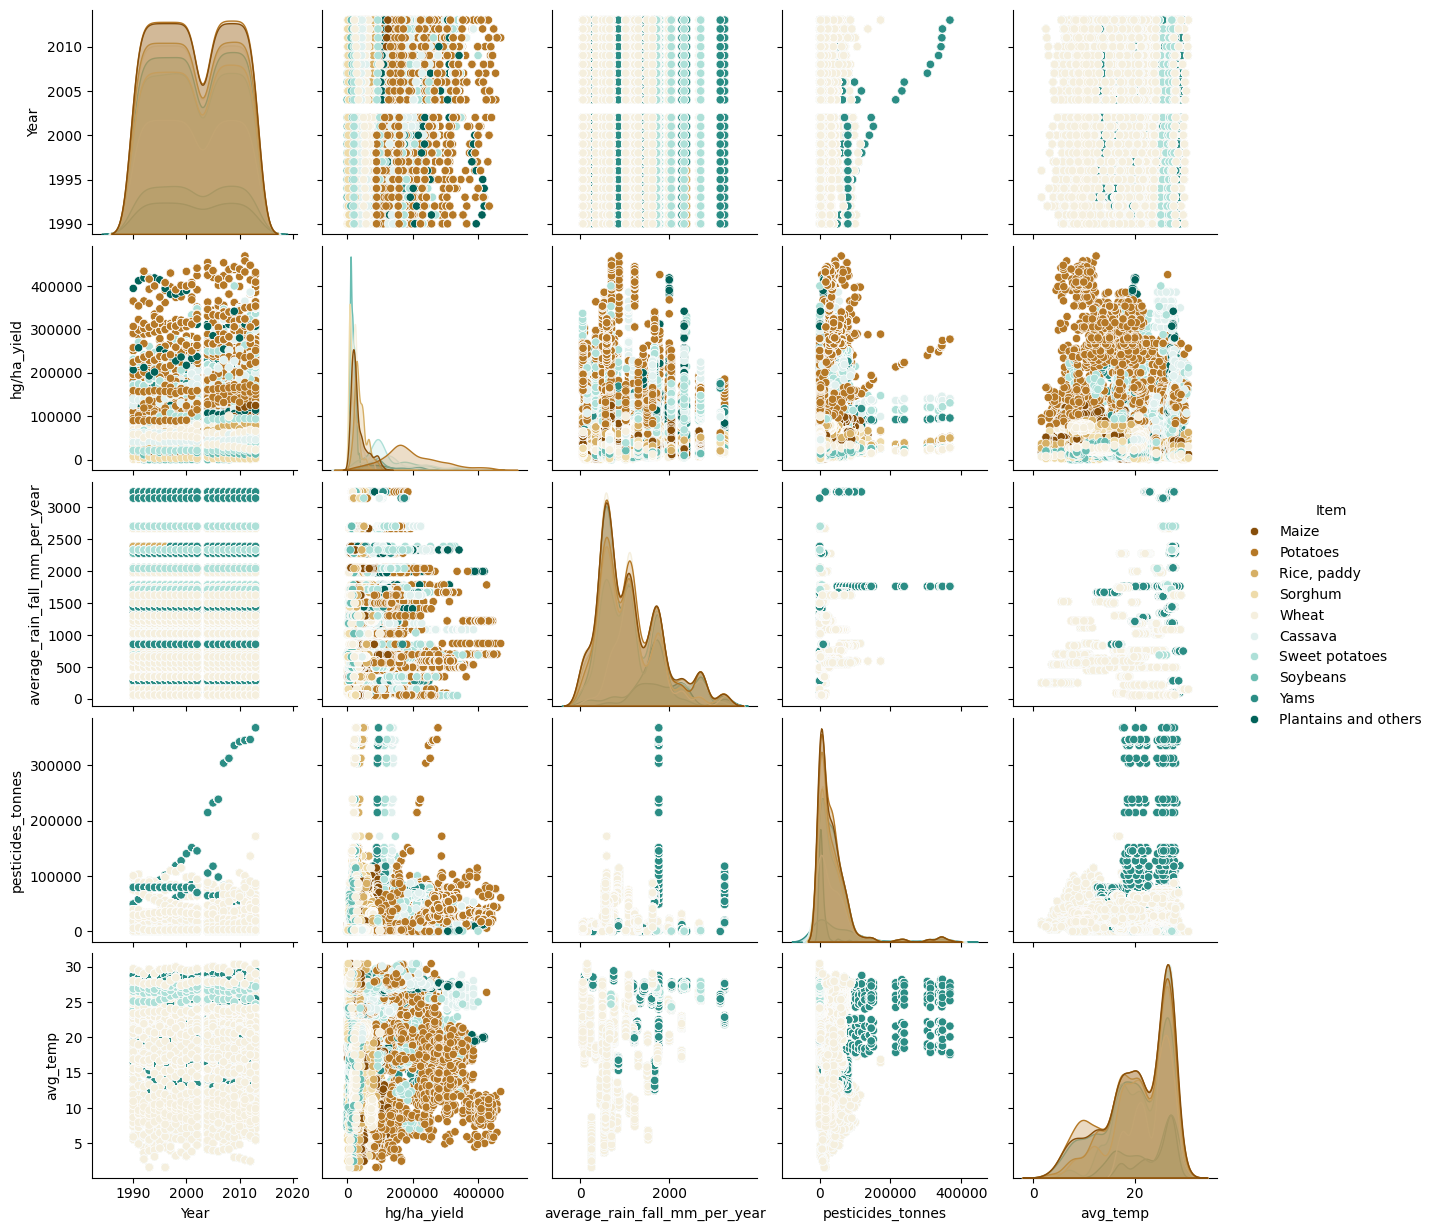

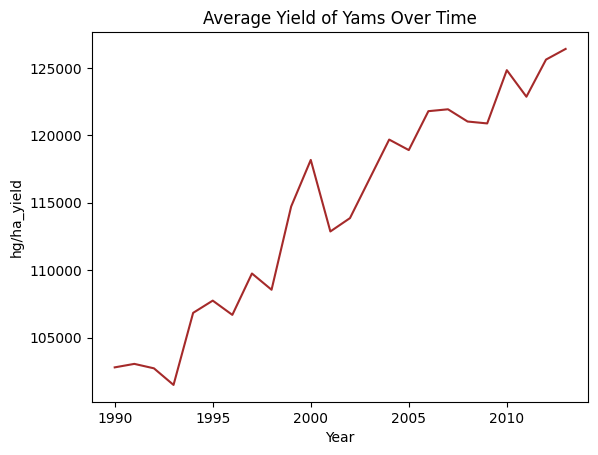

In [8]:
sns.pairplot(data=df, hue="Item", kind="scatter", palette="BrBG")
plt.show()
df2 = df[df["Item"] == "Yams"]
df2.groupby("Year")["hg/ha_yield"].mean().plot(color="brown")
plt.xlabel("Year")
plt.ylabel("hg/ha_yield")
plt.title("Average Yield of Yams Over Time")
plt.show()

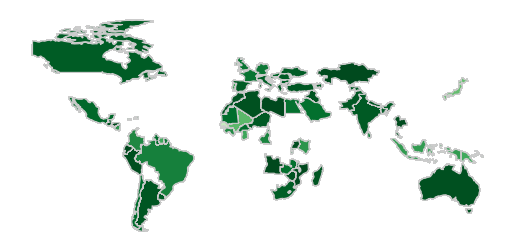

In [9]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data_geo = gpd.read_file(geojson_url)

merged_data = data_geo.merge(df, left_on="NAME", right_on="Area", how="left")
merged_data.plot(column="hg/ha_yield", cmap="Greens_r", linewidth=0.8, edgecolor="0.8")
plt.axis("off")
plt.show()

del merged_data
del data_geo


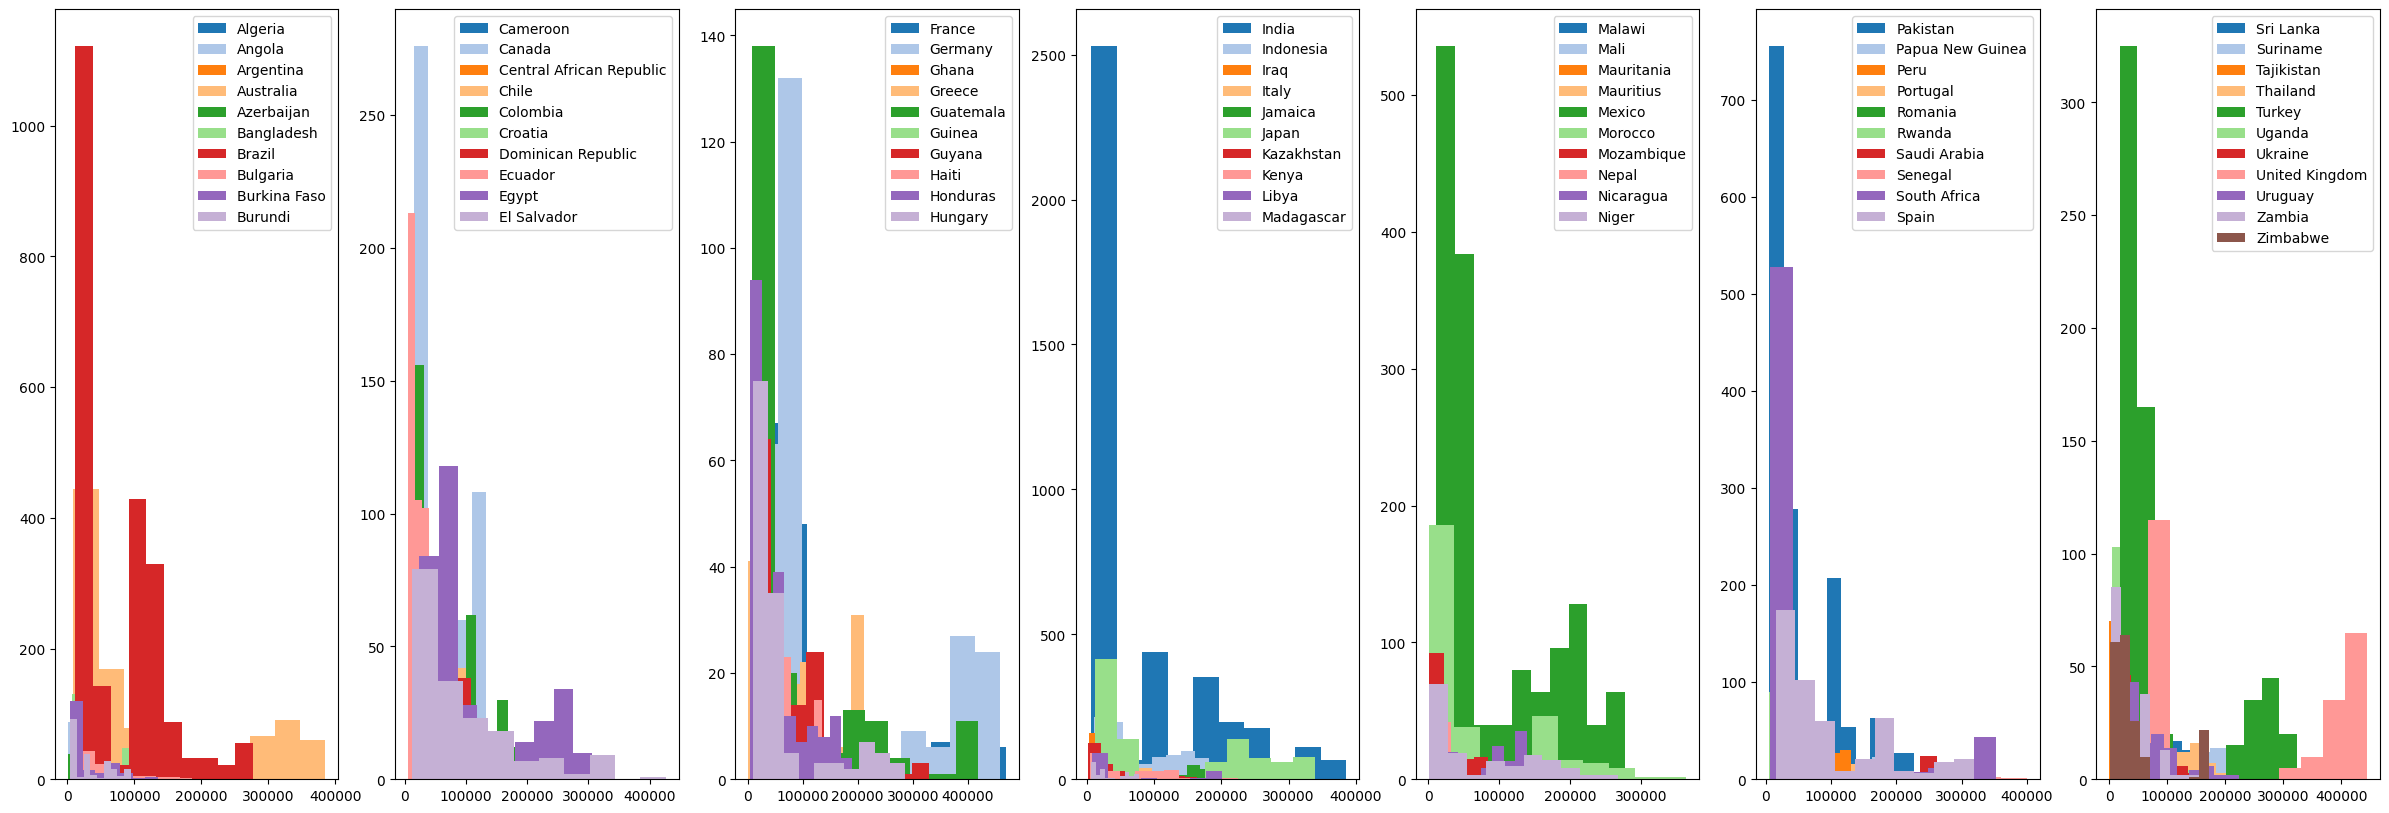

In [10]:
palette = sns.color_palette("tab20", 21, as_cmap=True)
num_plots = 7
areas_per_plot = 10

unique_areas = sorted(df["Area"].unique())
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), 
areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]

fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))
for idx, ax in enumerate(axs):
    plot_df = df[df["Area"].isin(area_chunks[idx])]
    for j, area in enumerate(plot_df["Area"].unique()):
        segment = plot_df[plot_df["Area"] == area]
        ax.hist(segment["hg/ha_yield"], facecolor=palette(j), label=area)
    ax.legend()
plt.show()